In [3]:
# Weihao Liu
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

# Too Large a Dataset for KNN, Do PCA First (Principal Component Analysis - an unsupervised dimensionality reduction)

In [5]:
pca = PCA(n_components = 10)
X_Train_pca = pca.fit_transform(X_train_balanced)
X_Test_pca = pca.transform(X_test_balanced)

In [7]:
#Instantiating KNeighborsClassifier object
k=3
ccfd_kneighbors = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')

#Training the model
ccfd_kneighbors.fit(X_Train_pca,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
kneighbors_prediction = ccfd_kneighbors.predict(X_Test_pca)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_kn = metrics.accuracy_score(y_test_balanced, kneighbors_prediction)

#Displaying final accuracy score
"Accuracy Score: ", score_kn

Accuracy Score:  0.8953360590587215


# ROC / AUC

Area Under Curve: 
0.7308814624124019


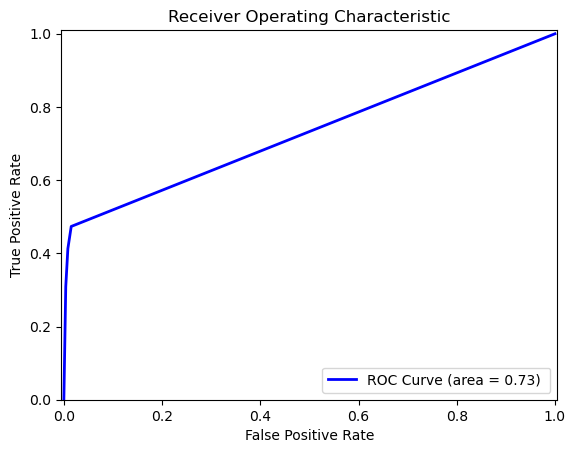

In [14]:
#Estimating the probability of Credit Card Fraud Label
kneighbors_prediction_probability = ccfd_kneighbors.predict_proba(X_Test_pca)

#Calculating true positive rate(tpr) and false positive rate(fpr)
knn_pca_fpr, knn_pca_tpr, knn_pca_thresholds = metrics.roc_curve(y_test_balanced, kneighbors_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
knn_AUC = metrics.auc(knn_pca_fpr, knn_pca_tpr)
print("Area Under Curve: ")
print(knn_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(knn_pca_fpr, knn_pca_tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f) ' % knn_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');